# Assignment Chapter 2 - DEEP LEARNING [Case #3]
Startup Campus, Indonesia - `Artificial Intelligence (AI)` (Batch 7)
* Task: **REGRESSION**
* DL Framework: **Tensorflow-Keras**
* Dataset: California House Price
* Libraries: Pandas, Numpy, Scikit-learn, Matplotlib
* Objective: Predict House Pricing with Dual Input Settings using Multilayer Perceptron

`PERSYARATAN` Semua modul (termasuk versi yang sesuai) sudah di-install dengan benar.
<br>`CARA PENGERJAAN` Lengkapi baris kode yang ditandai dengan **#TODO**.
<br>`TARGET PORTFOLIO` Peserta mampu memprediksi harga rumah menggunakan *Multilayer Perceptron*

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

### Load Dataset

In [2]:
housing = fetch_california_housing()
print("Features name: {}".format(housing.feature_names))
print("Features data:\n{}".format(housing.data))
print("Target data:\n{}".format(housing.target)) # target is the house price

Features name: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Features data:
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
Target data:
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [3]:
# TODO: Ubah "features" dan "target" dari Numpy Array ke Pandas DataFrame
features_df = pd.DataFrame(housing.data, columns=housing.feature_names)
target_df = pd.DataFrame(housing.target, columns=["Target"])
datafr = pd.concat([features_df, target_df], axis=1)
print(datafr.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


### Train / Validation / Test Split

In [4]:
# TODO: Pisahkan data menjadi train, validation, dan test
# HINT: Pertama, pisahkan data menjadi train dan test.
#       Selanjutnya, pisahkan data train menjadi dua, yaitu data train dan data validation.

# Memisahkan fitur dan target dari datafr
x = datafr[housing.feature_names]
y = datafr["Target"]

# Memisahkan data menjadi train (80%) dan test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print("x_train", x_train.shape, "y_train", y_train.shape)
print("x_val", x_val.shape, "y_val", y_val.shape)
print("x_test", x_test.shape, "y_test", y_test.shape)

x_train (13209, 8) y_train (13209,)
x_val (3303, 8) y_val (3303,)
x_test (4128, 8) y_test (4128,)


### Standardization and Normalization

In [5]:
# TODO: Lakukan standarisasi untuk data train, validation, dan test menggunakan StandardScaler()

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Menampilkan contoh hasil standarisasi
print("x_train standar:\n", x_train[:5])
print("x_val standar:\n", x_val[:5])
print("x_test standar:\n", x_test[:5])

x_train standar:
 [[ 0.44340968 -0.12449485  0.5204714   0.05758629 -0.48710064  0.05165771
   1.10281811 -0.69155432]
 [ 0.00321001 -1.07770852 -0.17083875 -0.04872181  1.69902706 -0.05515937
  -0.72493883  0.8544348 ]
 [-0.52181236 -0.20392932 -0.06125032  0.28089603 -0.13535041 -0.01697183
  -0.88428174  0.86440892]
 [ 0.59850347  0.43154646  0.49756019  0.10982954 -0.63483574 -0.04173809
  -0.60777493 -0.07814573]
 [ 0.61813493 -0.28336379  0.45553373 -0.22625511  0.37820493 -0.07532334
   1.33714592 -0.96085565]]
x_val standar:
 [[-0.17537802  0.51098093  0.5302405  -0.13220911 -0.78257084 -0.01150308
   0.51231202 -0.13300341]
 [-0.8976145  -0.44223274 -0.53480533 -0.28120633 -0.32265741 -0.04541862
   2.5181581  -2.28242699]
 [ 0.17894064 -1.15714299 -0.70953856 -0.09892453  1.51347882 -0.15285569
  -0.92646075  0.82949949]
 [ 0.16073789 -1.47488089 -0.62243171 -0.30675593 -0.80015835 -0.1583252
  -0.70150605  0.56518522]
 [ 1.71754935 -0.04506038  0.6652203  -0.20974806 -0.5231

In [6]:
# TODO: Lakukan normalisasi untuk data train, validation, dan test menggunakan MinMaxScaler()

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)

x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

print("x_train normal:\n", x_train[:5])
print("x_val normal:\n", x_val[:5])
print("x_test normal:\n", x_test[:5])

x_train normal:
 [[0.29013393 0.50980392 0.09248248 0.04962538 0.02438409 0.00449301
  0.57933972 0.33665339]
 [0.23276231 0.2745098  0.06843844 0.04691344 0.09406093 0.00327006
  0.16400426 0.64541833]
 [0.16433566 0.49019608 0.07224997 0.05532204 0.03559517 0.00370727
  0.12779553 0.64741036]
 [0.31034744 0.64705882 0.09168562 0.05095811 0.01967544 0.00342372
  0.19062833 0.45916335]
 [0.31290603 0.47058824 0.09022393 0.04238454 0.05196334 0.0030392
  0.63258786 0.28286853]]
x_val normal:
 [[0.20948677 0.66666667 0.09282226 0.04478367 0.01496679 0.00376988
  0.44515442 0.44820717]
 [0.11535703 0.43137255 0.05577953 0.04098273 0.02962527 0.00338158
  0.90095847 0.0189243 ]
 [0.25566544 0.25490196 0.04970224 0.04563276 0.08814709 0.00215153
  0.11821086 0.64043825]
 [0.25329306 0.17647059 0.05273185 0.04033095 0.01440623 0.00208891
  0.16932907 0.5876494 ]
 [0.45619371 0.52941176 0.09751691 0.04280564 0.02323496 0.00284695
  0.11395101 0.64243028]]
x_test normal:
 [[0.08146784 0.470588

### Advanced Splitting
Perform an advance split into **multiple overlapping input (A and B)**, where **input A** consists of feature 0 to 4 and **input B** consists of feature 2 to 7.

In [7]:
x_train_A, x_train_B = x_train[:, :5], x_train[:, 2:]
x_val_A, x_val_B = x_val[:, :5], x_val[:, 2:]
x_test_A, x_test_B = x_test[:, :5], x_test[:, 2:]

# samples to predict after training
x_new_A, x_new_B = x_test_A[:3], x_test_B[:3]

print("x_train_A", x_train_A.shape, "x_train_B", x_train_B.shape)
print("x_val_A", x_val_A.shape, "x_val_B", x_val_B.shape)
print("x_test_A", x_test_A.shape, "x_test_B", x_test_B.shape)

x_train_A (13209, 5) x_train_B (13209, 6)
x_val_A (3303, 5) x_val_B (3303, 6)
x_test_A (4128, 5) x_test_B (4128, 6)


### Regression Modeling with Neural Network

<font color="red">**- - - - MOHON DIPERHATIKAN - - - -**</font>
<br> Keras/Tensorflow akan **secara otomatis** menambah layer neural network apabila kamu menjalankan ulang *cell* terkait. Jadi, silakan <b>*restart kernel*</b> dan jalankan ulang (*rerun*) semua kode agar hasil sesuai.

> <font color="red"> **(Step 1) Build the Model**</font>

Yang dilakukan pada tahap ini:
* Tentukan *parameters*, yaitu `weight` dan `bias`
* Tentukan *hyperparameters*, yaitu total neurons di (1) input layers, (2) hidden layers, and (3) output layer
* Tentukan *activation functions*

<br> Lihat dokumentasi **Keras Core Layers** [**disini**](https://keras.io/api/layers/core_layers/).
<br> Lihat dokumentasi **Keras Model.summary()** dan **Model.get_layers() method**  [**disini**](https://keras.io/api/models/model/#summary-method).
<br> Lihat dokumentasi **Keras Layer Initializer** untuk *weights* (*kernel_initializer*) dan *biases* (*bias_initializer*) [**disini**](https://keras.io/api/layers/initializers/).
<br> Lihat dokumentasi **Keras Activation Functions** [**disini**](https://keras.io/api/layers/activations/).

Secara default di bagian `.layers.Dense()`, sudah ditentukan `activation=None`, `kernel_initializer="glorot_uniform"` dan `bias_initializer="zeros"`.

In [8]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])

# TODO: Buat hidden layer pertama dengan 30 neuron dan ReLU sebagai activation function
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)

# TODO: Buat hidden layer kedua dengan 30 neuron dan ReLU sebagai activation function
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
regression_model = keras.Model(inputs=[input_A, input_B], outputs=[output])
regression_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 6)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            210 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer (InputLayer)  │ (None, 5)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 35)             │              0 │ input_layer[0][0],     │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             36 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,176 (4.59 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 0 (0.00 B)

> <font color="red"> **(Step 2) Compile the Model** </font>

Yang dilakukan pada tahap ini:
* Tentukan `loss_function`, `optimizer` (termasuk `learning_rate` dan `momentum`), dan `metrics` (opsional)

Lihat dokumentasi **Keras Model.compile() method** [**disini**](https://keras.io/api/models/model_training_apis/#compile-method).
<br> Lihat dokumentasi **Keras Loss Function** [**disini**](https://keras.io/api/losses/).
<br> Lihat dokumentasi **Keras Optimizers** [**disini**](https://keras.io/api/optimizers/).
<br> Lihat dokumentasi **Keras Metrics** [**disini**](https://keras.io/api/metrics/).

In [9]:
# TODO: Tentukan learning rate
lr = 0.001

regression_model.compile(
    loss=["mean_squared_error"],
    optimizer=tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
    metrics=["mean_absolute_error"]
)

**Catatan:** Di Keras-Tensorflow,
* `loss="mean_squared_error"` **ekuivalen** dengan `loss=tf.keras.losses.MeanSquaredError()`
* `optimizer="Adam"` **ekuivalen** dengan `optimizer=tf.keras.optimizers.Adam()`

> <font color="red"> **(Step 3) Train the Model** </font>

Yang dilakukan pada tahap ini:
* Tentukan *learning hyperparameters*, yaitu `epochs` dan `batch_size`
* Inisiasi `validation_data` (opsional)

Lihat dokumentasi **Keras Model.fit() method** [**disini**](https://keras.io/api/models/model_training_apis/#fit-method).

In [10]:
# TODO: Tentukan jumlah epoch (iterasi)
n_epoch = 100

# TODO: Tentukan jumlah batch
batch_size = 32

In [11]:
reg_result = regression_model.fit(
    x=[x_train_A, x_train_B],
    y=[y_train, y_train],
    epochs=n_epoch, batch_size=batch_size,
    validation_data=([x_val_A, x_val_B], [y_val, y_val])
)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.9175 - mean_absolute_error: 1.0742 - val_loss: 1.2098 - val_mean_absolute_error: 0.8779
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.1419 - mean_absolute_error: 0.8463 - val_loss: 1.0687 - val_mean_absolute_error: 0.8198
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.9750 - mean_absolute_error: 0.7807 - val_loss: 0.9625 - val_mean_absolute_error: 0.7805
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.9118 - mean_absolute_error: 0.7586 - val_loss: 0.8798 - val_mean_absolute_error: 0.7386
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7886 - mean_absolute_error: 0.6960 - val_loss: 0.8093 - val_mean_absolute_error: 0.7015
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7587 - mean_absolute_error: 0.6807 - val_loss: 0.7466 - val_mean_absolute_error: 0.6664
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7006 - mean_absolute_error: 0.6

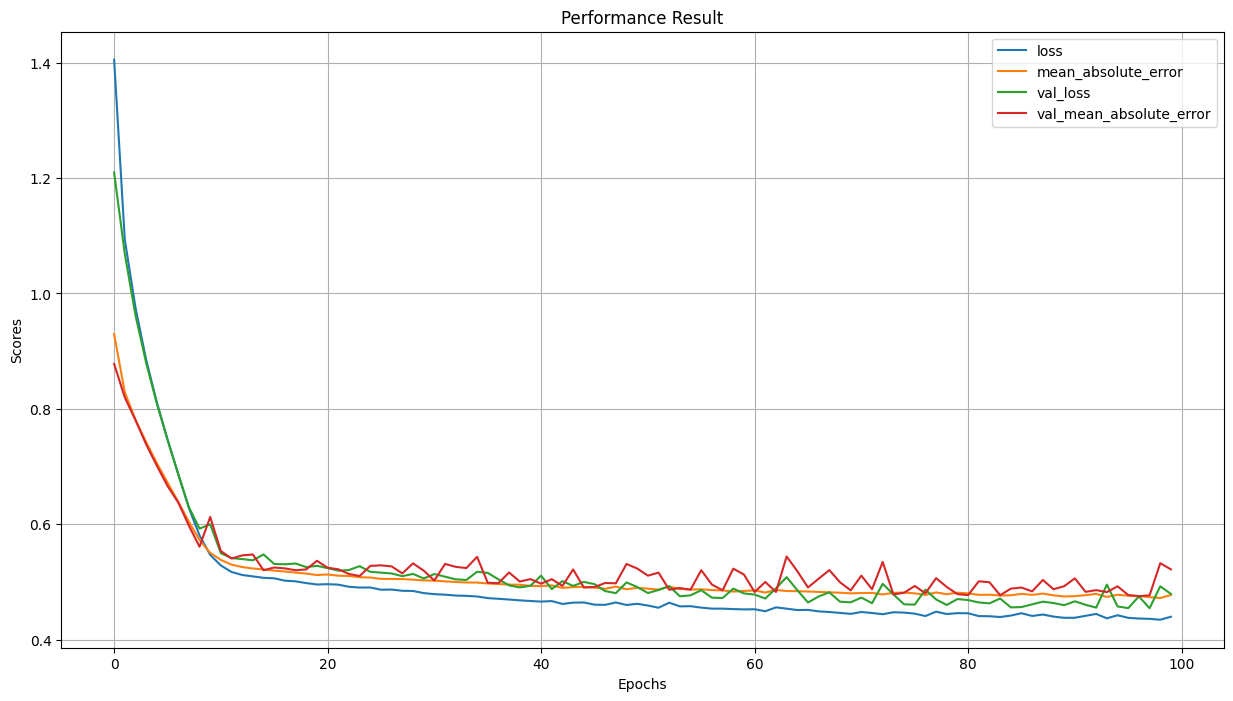

In [12]:
pd.DataFrame(reg_result.history).plot(figsize=(15, 8))

plt.title("Performance Result")
plt.xlabel("Epochs")
plt.ylabel("Scores")
plt.grid(True)
plt.show()

<font color="red">**- - - - STOP, CEK DULU! - - - -**</font>
<br>Sebelum melakukan evaluasi dan penyimpanan model, **pastikan *val_loss* berada dibawah 0.50** dan **tidak terjadi *overfitting***.
<br>Silakan ulangi langkah diatas sebagai langkah *hyperparameter tuning* jika terjadi.

> <font color="red"> **(Step 4) Evaluate the Model with Test Data** </font>

Lihat dokumentasi **Keras Model.evaluate() method** [**disini**](https://keras.io/api/models/model_training_apis/#evaluate-method).

In [13]:
regression_model.evaluate([x_test_A, x_test_B], [y_test, y_test])

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4674 - mean_absolute_error: 0.5169


[0.4703418016433716, 0.5138959288597107]

> <font color="red"> **(Step 4) Save and Reload the Model** </font>

In [14]:
# TODO: Berikan nama file untuk model, diakhiri dengan ekstensi .keras
filename = "case03.keras"

# save the model into your local storage
regression_model.save(filename)

print(f"Model telah disimpan dengan nama: {filename}")

Model telah disimpan dengan nama: case03.keras


In [15]:
# TODO: Reload model dan lakukan prediksi dengan data baru (x_new_A dan x_new_B)
this_model = keras.models.load_model(filename)
this_model.predict([x_new_A, x_new_B])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


array([[0.38161147],
       [1.1268413 ],
       [3.1096084 ]], dtype=float32)

### Scoring
Total `#TODO` = 10
<br>Checklist:

- [x] Ubah "features" dan "target" dari Numpy Array ke Pandas DataFrame
- [x] Pisahkan data menjadi train, validation, dan test
- [x] Lakukan standarisasi untuk data train, validation, dan test menggunakan StandardScaler()
- [x] Lakukan normalisasi untuk data train, validation, dan test menggunakan MinMaxScaler()
- [x] Buat hidden layer pertama dengan 30 neuron dan ReLU sebagai activation function
- [x] Buat hidden layer kedua dengan 30 neuron dan ReLU sebagai activation function
- [x] Tentukan jumlah epoch (iterasi)
- [x] Tentukan jumlah batch
- [x] Berikan nama file untuk model, diakhiri dengan ekstensi .keras
- [x] Reload model dan lakukan prediksi dengan data baru (`x_new_A` dan `x_new_B`)

### Additional readings
- N/A

### Copyright © 2024 Startup Campus, Indonesia
* Prepared by **Nicholas Dominic, M.Kom.** [(profile)](https://linkedin.com/in/nicholas-dominic)
* You may **NOT** use this file except there is written permission from PT. Kampus Merdeka Belajar (Startup Campus).
* Please address your questions to mentors.